In [ ]:
# ! pip install kaggle

In [ ]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
!kaggle datasets download -d omkargurav/face-mask-dataset

Dataset URL: https://www.kaggle.com/datasets/omkargurav/face-mask-dataset
License(s): unknown
face-mask-dataset.zip: Skipping, found more recently modified local copy (use --force to force download)


In [ ]:
from zipfile import ZipFile
dataset = '/content/face-mask-dataset.zip'
with ZipFile(dataset,'r') as zip:
  zip.extractall()
  print('The dataset is extracted')

The dataset is extracted


###  **Importing Libraries**
This cell imports the required Python libraries.  
- `numpy`, `pandas` → data handling  
- `matplotlib`, `seaborn` → visualization  
- `sklearn` or `tensorflow/pytorch` → machine learning models  

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
from sklearn.model_selection import train_test_split
import matplotlib.image as mpimg
import cv2
from google.colab.patches import cv2_imshow
from PIL import Image

In [ ]:
with_mask_files = os.listdir('/content/data/with_mask')
without_mask_files = os.listdir('/content/data/without_mask')
print('Number of with mask images:', len(with_mask_files))
print('Number of without mask images:', len(without_mask_files))


Number of with mask images: 3725
Number of without mask images: 3828


### **Creating Labels**
This cell creates labels:
- `1` for 3725 images with mask
- `0` for 3828 images without mask, then combines them into a single list.  


In [ ]:
with_mask_label=[1]*3725
without_mask_label=[0]*3828
label=with_mask_label+without_mask_label
print(len(label))

7553


In [ ]:
print(label[0:6])
print(label[-6:])

[1, 1, 1, 1, 1, 1]
[0, 0, 0, 0, 0, 0]


**Displaying images**

In [ ]:
import tensorflow as tf
from tensorflow.keras.utils import load_img, img_to_array

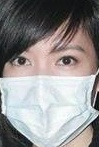

In [ ]:
img=load_img('/content/data/with_mask/with_mask_5.jpg')
img

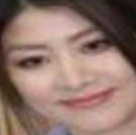

In [ ]:
without_mask_image=load_img('/content/data/without_mask/without_mask_3.jpg')
without_mask_image

### Image Loading and Preprocessing  
- This cell loads images from the `with_mask` and `without_mask` folders
- resizes them to 128×128 pixels
- converts them into arrays
- stores them in the `data` list for further processing.  


In [ ]:
with_mask_path='/content/data/with_mask/'
without_mask_path='/content/data/without_mask/'
data=[]
for img_file in with_mask_files:
  img=tf.io.read_file(with_mask_path+img_file)
  img=tf.image.decode_image(img,channels=3)
  img=tf.image.resize(img,[128,128])
  img=img.numpy()
  data.append(img)

for img_file in without_mask_files:
  img=tf.io.read_file(without_mask_path+img_file)
  img=tf.image.decode_image(img,channels=3)
  img=tf.image.resize(img,[128,128])
  img=img.numpy()
  data.append(img)



In [ ]:
type(data)

list

In [ ]:
data

[array([[[2.27500e+01, 2.72500e+01, 2.47500e+01],
         [2.20000e+01, 2.60000e+01, 2.80000e+01],
         [2.30000e+01, 2.90000e+01, 2.90000e+01],
         ...,
         [1.06375e+02, 1.06375e+02, 1.11375e+02],
         [9.05000e+01, 8.65000e+01, 8.20000e+01],
         [1.14000e+02, 1.01000e+02, 7.60000e+01]],
 
        [[2.42500e+01, 3.02500e+01, 2.72500e+01],
         [2.40000e+01, 2.95000e+01, 3.10000e+01],
         [2.45000e+01, 3.05000e+01, 3.05000e+01],
         ...,
         [1.07500e+02, 1.07500e+02, 1.12500e+02],
         [9.25000e+01, 8.86250e+01, 8.25000e+01],
         [1.14750e+02, 1.01875e+02, 7.51250e+01]],
 
        [[2.20000e+01, 3.10000e+01, 2.70000e+01],
         [2.00000e+01, 2.85000e+01, 2.90000e+01],
         [2.22500e+01, 2.82500e+01, 2.82500e+01],
         ...,
         [1.06250e+02, 1.06250e+02, 1.11250e+02],
         [9.28750e+01, 8.93750e+01, 7.98750e+01],
         [1.12750e+02, 1.00250e+02, 7.10000e+01]],
 
        ...,
 
        [[1.04000e+02, 1.04000e+02

In [ ]:
print("length of data file is:",len(data))

length of data file is: 7553


In [ ]:
data[0].shape

(128, 128, 3)

In [ ]:
X=np.array(data)
y=np.array(label)

In [ ]:
type(X)

numpy.ndarray

In [ ]:
type(y)

numpy.ndarray

### **Train-Test Split**  
- This cell splits the dataset into training and testing sets, using 80% for training and 20% for testing, with a fixed random state for reproducibility.  


In [ ]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=2)

In [ ]:
X_train[0]

array([[[ 82.      ,  76.      ,  78.      ],
        [ 79.14844 ,  73.14844 ,  75.14844 ],
        [ 73.91406 ,  67.91406 ,  69.91406 ],
        ...,
        [ 23.617188,  26.617188,  33.617188],
        [ 22.570312,  25.570312,  32.570312],
        [ 22.      ,  25.      ,  32.      ]],

       [[ 80.96094 ,  74.96094 ,  76.96094 ],
        [ 74.85013 ,  68.85013 ,  70.85013 ],
        [ 63.633026,  57.633026,  59.633026],
        ...,
        [ 21.638504,  24.638504,  31.638504],
        [ 20.863571,  23.863571,  30.863571],
        [ 20.441406,  23.441406,  30.441406]],

       [[ 78.40625 ,  71.80859 ,  73.609375],
        [ 70.985504,  64.55827 ,  66.302246],
        [ 57.36386 ,  51.249466,  52.88916 ],
        ...,
        [ 20.804688,  23.804688,  30.40625 ],
        [ 20.28125 ,  23.28125 ,  29.882812],
        [ 19.996094,  22.996094,  29.597656]],

       ...,

       [[145.61328 , 115.61328 , 125.61328 ],
        [139.85    , 110.99063 , 120.81909 ],
        [129.27084 , 1

In [ ]:
X_test

array([[[[220.1875  , 222.1875  , 211.1875  ],
         [220.87073 , 222.87073 , 211.87073 ],
         [223.      , 225.      , 214.      ],
         ...,
         [ 87.444336,  88.444336,  73.26465 ],
         [ 49.784058,  49.784058,  39.784058],
         [ 36.91797 ,  36.91797 ,  28.753906]],

        [[221.07422 , 223.07422 , 212.07422 ],
         [223.93079 , 225.93079 , 214.93079 ],
         [222.57605 , 224.57605 , 213.57605 ],
         ...,
         [ 48.732544,  49.617188,  35.      ],
         [ 35.664062,  35.664062,  26.580322],
         [ 32.80078 ,  32.80078 ,  24.800781]],

        [[212.69177 , 214.69177 , 203.69177 ],
         [221.39478 , 223.39478 , 212.39478 ],
         [223.68665 , 225.68665 , 214.68665 ],
         ...,
         [ 38.95703 ,  39.546875,  27.1875  ],
         [ 25.938843,  25.823486,  18.169556],
         [ 30.23108 ,  29.23108 ,  24.23108 ]],

        ...,

        [[208.39539 , 195.33289 , 169.33289 ],
         [214.76147 , 201.69897 , 175.69897 ]

In [ ]:
X_train_shaped=X_train/255
X_test_shaped=X_test/255

In [ ]:
X_train_shaped[0]

array([[[0.32156864, 0.29803923, 0.30588236],
        [0.31038603, 0.28685662, 0.29469976],
        [0.28985906, 0.26632965, 0.27417278],
        ...,
        [0.09261642, 0.10438113, 0.13183211],
        [0.08851103, 0.10027573, 0.12772672],
        [0.08627451, 0.09803922, 0.1254902 ]],

       [[0.3174939 , 0.29396448, 0.3018076 ],
        [0.29352993, 0.27000052, 0.27784365],
        [0.24954128, 0.22601187, 0.23385501],
        ...,
        [0.08485688, 0.09662159, 0.12407257],
        [0.08181792, 0.09358263, 0.12103361],
        [0.08016238, 0.09192708, 0.11937806]],

       [[0.30747548, 0.28160232, 0.28866422],
        [0.27837452, 0.2531697 , 0.2600088 ],
        [0.22495632, 0.2009783 , 0.20740847],
        ...,
        [0.08158701, 0.09335171, 0.11924019],
        [0.07953431, 0.09129902, 0.1171875 ],
        [0.07841606, 0.09018076, 0.11606924]],

       ...,

       [[0.57103246, 0.4533854 , 0.4926011 ],
        [0.5484314 , 0.43525738, 0.47380036],
        [0.5069445 , 0

In [ ]:
X_test_shaped[0]

array([[[0.8634804 , 0.8713235 , 0.8281863 ],
        [0.86615974, 0.8740029 , 0.8308656 ],
        [0.8745098 , 0.88235295, 0.8392157 ],
        ...,
        [0.34291896, 0.34684053, 0.28731236],
        [0.1952316 , 0.1952316 , 0.15601592],
        [0.14477634, 0.14477634, 0.11276042]],

       [[0.8669577 , 0.87480086, 0.8316636 ],
        [0.87815994, 0.8860031 , 0.8428658 ],
        [0.87284726, 0.8806904 , 0.83755314],
        ...,
        [0.19110802, 0.1945772 , 0.13725491],
        [0.13985907, 0.13985907, 0.10423656],
        [0.12863052, 0.12863052, 0.09725796]],

       [[0.8340854 , 0.84192854, 0.7987913 ],
        [0.8682148 , 0.8760579 , 0.8329207 ],
        [0.8772025 , 0.88504565, 0.8419084 ],
        ...,
        [0.15277267, 0.15508579, 0.10661764],
        [0.10172095, 0.10126857, 0.07125316],
        [0.11855325, 0.11463168, 0.09502384]],

       ...,

       [[0.8172368 , 0.7660113 , 0.6640505 ],
        [0.8422019 , 0.79097635, 0.68901557],
        [0.7710411 , 0

###  **Building the CNN Model**  
- This cell creates a Sequential Convolutional Neural Network (CNN) with convolution, pooling, dense, and dropout layers to classify images as with mask or without mask.  


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D,MaxPooling2D,Flatten,Dense,Dropout

model=Sequential([
    Conv2D(32,kernel_size=(3,3),activation='relu',input_shape=(128,128,3)),
    MaxPooling2D(pool_size=(2,2)),
    Conv2D(64,kernel_size=(3,3),activation='relu'),
    MaxPooling2D(pool_size=(2,2)),
    Flatten(),
    Dense(128,activation='relu'),
    Dropout(0.5),
    Dense(64,activation='relu'),
    Dropout(0.5),
    Dense(2,activation='sigmoid')])

/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


### **Compiling the Model**  
- This cell compiles the CNN using the Adam optimizer, sparse categorical cross-entropy loss, and accuracy as the evaluation metric.  


In [ ]:
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

### **Training the Model**  
This cell trains the CNN for 5 epochs using the training data and evaluates performance on the validation set.  


In [ ]:
history=model.fit(X_train_shaped,y_train,epochs=5,validation_data=(X_test_shaped,y_test))

Epoch 1/5
189/189 ━━━━━━━━━━━━━━━━━━━━ 16s 50ms/step - accuracy: 0.7325 - loss: 0.5706 - val_accuracy: 0.8987 - val_loss: 0.2745
Epoch 2/5
189/189 ━━━━━━━━━━━━━━━━━━━━ 9s 18ms/step - accuracy: 0.8870 - loss: 0.2855 - val_accuracy: 0.9054 - val_loss: 0.2255
Epoch 3/5
189/189 ━━━━━━━━━━━━━━━━━━━━ 4s 19ms/step - accuracy: 0.9164 - loss: 0.2120 - val_accuracy: 0.9173 - val_loss: 0.1998
Epoch 4/5
189/189 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - accuracy: 0.9291 - loss: 0.1849 - val_accuracy: 0.9027 - val_loss: 0.2476
Epoch 5/5
189/189 ━━━━━━━━━━━━━━━━━━━━ 5s 18ms/step - accuracy: 0.9345 - loss: 0.1763 - val_accuracy: 0.9351 - val_loss: 0.1669


In [ ]:
loss, accuracy = model.evaluate(X_test_shaped, y_test)
print('Test Accuracy =', accuracy)

48/48 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9316 - loss: 0.1663
Test Accuracy = 0.9351422786712646


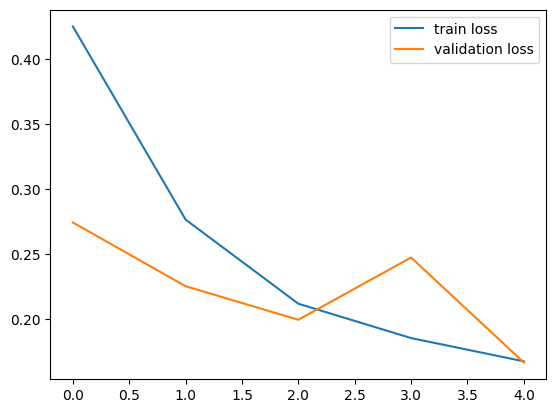

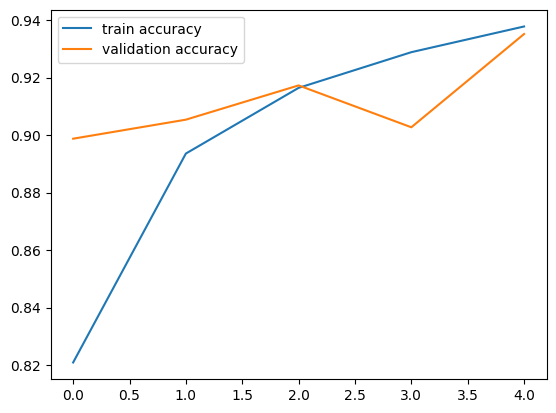

In [ ]:
h = history

# plot the loss value
plt.plot(h.history['loss'], label='train loss')
plt.plot(h.history['val_loss'], label='validation loss')
plt.legend()
plt.show()

# plot the accuracy value
plt.plot(h.history['accuracy'], label='train accuracy')
plt.plot(h.history['val_accuracy'], label='validation accuracy')
plt.legend()
plt.show()

Path of the image to be predicted: /content/data/with_mask/with_mask_1009.jpg


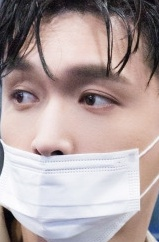

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 653ms/step
[[0.17054957 0.7653914 ]]
1
The person in the image is wearing a mask


In [ ]:
input_image_path = input('Path of the image to be predicted: ')

input_image = cv2.imread(input_image_path)

cv2_imshow(input_image)

input_image_resized = cv2.resize(input_image, (128,128))

input_image_scaled = input_image_resized/255

input_image_reshaped = np.reshape(input_image_scaled, [1,128,128,3])

input_prediction = model.predict(input_image_reshaped)

print(input_prediction)


input_pred_label = np.argmax(input_prediction)

print(input_pred_label)


if input_pred_label == 1:

  print('The person in the image is wearing a mask')

else:

  print('The person in the image is not wearing a mask')

In [ ]:
model.save("face_mask_detection_model.keras")


In [ ]:
from google.colab import files
files.download("face_mask_detection_model.keras")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

## **Conclusion**  
In this project, we built and trained a Convolutional Neural Network (CNN) to detect whether a person is wearing a mask or not.  

- Images were loaded and preprocessed into a standard format.  
- A CNN model was designed with convolution, pooling, dense, and dropout layers.  
- The model was compiled and trained with accuracy as the main metric.  
- Finally, the trained model was tested on new images to make predictions.  

This structured workflow demonstrates a practical deep learning solution for face mask detection.  
